In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json
with open("ICP_data.dat", "r") as f:
    data = json.load(f )

In [3]:
data.keys()

dict_keys(['info', '0'])

In [4]:
data["0"].keys()

dict_keys(['Te2', 'ne', 'ni', 'Je', 'Ji', 'phi', 'x', 'Pa', 'Pn', 'energwall', 'vwall'])

1.5104587002079912


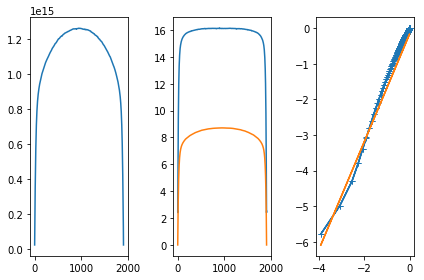

In [5]:
for k in ["0"]:
    Te = np.array(data[k]["Te2"])
    Phi = np.array(data[k]["phi"])
    ne = np.array(data[k]["ne"])
             
    ln_n = np.log(ne/ne.max())
    ln_p = np.log((ne*Te)/(ne*Te).max())
    
    plt.figure()
    plt.subplot(131)
    plt.plot(ne)
    plt.subplot(132)
    plt.plot(Te*4.68)
    plt.plot(Phi)
    plt.subplot(133)
    
    plt.plot(ln_n,ln_p,"-+")
    imax = 10
    gamma, a = np.polyfit(ln_n[:imax], ln_p[:imax], 1)
    plt.plot(ln_n, a+gamma*ln_n)
    print(gamma)
    plt.tight_layout()

/home/tavant/these/code/venv/stand/lib64/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


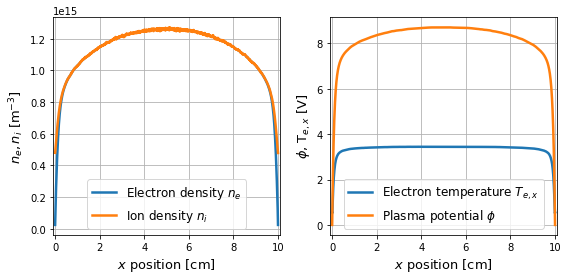

In [6]:
k ="0"

plt.figure(figsize=(8,4))
s = 2.5
plt.margins(x=0.01, y=0.1)

Te = np.array(data[k]["Te2"])
x = np.array(data[k]["x"])
Phi = np.array(data[k]["phi"])
ne = np.array(data[k]["ne"])
ni = np.array(data[k]["ni"])

ln_n = np.log(ne/ne.max())
ln_p = np.log((ne*Te)/(ne*Te).max())

plt.subplot(121)
plt.margins(x=0.01)

plt.plot(x, ne, label="Electron density $n_e$", linewidth = s)
plt.plot(x, ni, label="Ion density $n_i$", linewidth = s)
plt.ylabel("$n_e, n_i$ [m$^{-3}$]", fontsize=13)
plt.legend(fontsize=12, loc="lower center")

plt.subplot(122)
plt.margins(x=0.01)

plt.plot(x, Te, label="Electron temperature $T_{e,x}$", linewidth = s)
plt.plot(x, Phi, label="Plasma potential $\phi$", linewidth = s)
plt.ylabel("$\phi$, T$_{e,x}$ [V]", fontsize=13)
plt.legend(fontsize=12, loc="lower center")

for p in [121,122]:
    plt.subplot(p)
    plt.grid()
    plt.xlabel("$x$ position [cm]", fontsize=13)
plt.tight_layout()
plt.savefig("../figures/ICP_results.pdf")

1.4942995448981542


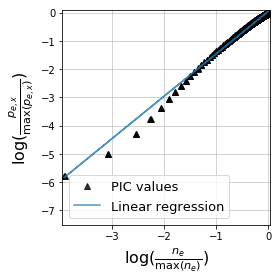

In [7]:

plt.figure(figsize=(4,4))

imax = -1
gamma, a = np.polyfit(ln_n[:imax], ln_p[:imax], 1)
print(gamma)

p = data[k]["Pn"]

ax = plt.gca()
ax.plot(ln_n, ln_p, "k^",alpha=0.8, label ="PIC values")
ax.plot(ln_n, a + gamma*ln_n, "-",alpha=0.8, label ="Linear regression")


# imax = 200
# gamma, a = np.polyfit(ln_n[:imax], ln_p[:imax], 1)
# print(gamma)
# ax.plot(ln_n, a + gamma*ln_n, "-",alpha=0.8, label ="sheath")

ax.set_ylabel("log($\\frac{p_{e,x}}{\max(p_{e,x})}$)", fontsize=16)
ax.set_xlabel("log($\\frac{n_e}{\max(n_e)}$)", fontsize=16)
# ax.set_title("Polytropic process, p= "+str(p)+" mTorr", fontsize=19)

ax.grid(alpha=0.7)
ax.margins(0.01)
ax.legend(fontsize=13)
ax.set_ylim(bottom=-7.5)
plt.tight_layout()
plt.savefig("../figures/ICP_polyfit.pdf")

In [7]:
gamma

1.4942995448981542

In [8]:
print(data[k]["Pa"])
print(data[k]["Pa"]/(0.1*0.1*7/450))

4.6e-06
0.02957142857142857


In [9]:
data[k]["Pn"]

0.1